# LIBRARY YANG DI GUNAKAN

1. import pandas as pd: Ini mengimpor library pandas dengan alias pd, yang sering digunakan untuk manipulasi dan analisis data tabular, termasuk data time series.

2. import numpy as np: Ini mengimpor library numpy dengan alias np, yang digunakan untuk operasi numerik efisien seperti perhitungan matematika.

3. import matplotlib.pyplot as plt: Ini mengimpor submodule pyplot dari library matplotlib dengan alias plt. Matplotlib digunakan untuk membuat visualisasi grafik dan plot data.

4. import seaborn as sns: Ini mengimpor library seaborn dengan alias sns, yang juga digunakan untuk membuat visualisasi data. Seaborn memudahkan pembuatan plot yang menarik dan informatif.

5. from statsmodels.tsa.seasonal import seasonal_decompose: Ini mengimpor fungsi seasonal_decompose dari submodule tsa dalam library statsmodels. Fungsi ini digunakan untuk melakukan dekomposisi musiman pada data time series.

6. from statsmodels.tsa.stattools import adfuller: Ini mengimpor fungsi adfuller dari submodule stattools dalam library statsmodels. Fungsi ini digunakan untuk melakukan uji Augmented Dickey-Fuller (ADF) pada data time series, yang berguna untuk menguji stasioneritas.

7. from statsmodels.graphics.tsaplots import plot_acf, plot_pacf: Ini mengimpor fungsi plot_acf dan plot_pacf dari submodule tsaplots dalam library statsmodels. Fungsi ini digunakan untuk membuat plot fungsi korelasi otokorelasi (ACF) dan parsial otokorelasi (PACF), yang berguna dalam analisis model ARIMA.

8. from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing: Ini mengimpor kelas SimpleExpSmoothing dan ExponentialSmoothing dari submodule holtwinters dalam library statsmodels. Kelas-kelas ini digunakan untuk model peramalan eksponensial sederhana dan eksponensial ganda.

9. from statsmodels.tsa.arima.model import ARIMA: Ini mengimpor kelas ARIMA dari submodule model dalam library statsmodels. Kelas ini digunakan untuk membangun model ARIMA (Autoregressive Integrated Moving Average).

10. from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error: Ini mengimpor fungsi mean_squared_error dan mean_absolute_percentage_error dari library scikit-learn. Fungsi ini digunakan untuk mengukur kinerja model peramalan dengan metrik seperti MSE (Mean Squared Error) dan MAPE (Mean Absolute Percentage Error).

11. import warnings: Ini mengimpor library warnings, yang digunakan untuk menangani pesan peringatan (warning) dalam kode.

12. from statsmodels.tools.sm_exceptions import ConvergenceWarning: Ini mengimpor pesan peringatan ConvergenceWarning dari submodule sm_exceptions dalam library statsmodels. Pesan peringatan ini berkaitan dengan masalah konvergensi dalam model time series.

In [1]:
import pandas as pd
import numpy as np

# library untuk lvisualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# library yang digunakan untuk forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# library untung mengabaikan error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Memanggil Dataset

1. url = 'https://github.com/adyanamul/dataset/raw/main/CO2_dataset.xlsx': Pada baris ini, sebuah string dengan nama url dibuat dan diisi dengan URL file Excel yang ingin dibaca. URL ini mengarah ke lokasi file Excel yang berada di repositori GitHub.

2. df = pd.read_excel(url,): Pada baris ini, kita menggunakan library pandas (diidentifikasi dengan pd) untuk membaca file Excel yang ada di URL yang telah ditentukan sebelumnya. Fungsi read_excel() digunakan untuk membaca data dari file Excel. Parameter pertama adalah url, yang merupakan URL file Excel yang ingin dibaca. Parameter kedua (yang tidak ada dalam kode Anda) biasanya digunakan untuk menentukan sheet dalam file Excel yang akan dibaca. Jika tidak diberikan, maka secara default akan membaca sheet pertama.

3. df.head(100): Pada baris ini, kita menggunakan DataFrame yang telah dibaca dari file Excel (disimpan dalam variabel df) untuk menampilkan 100 baris pertama dari data tersebut. Fungsi head() digunakan untuk menampilkan sejumlah baris pertama dari DataFrame. Jumlah baris yang akan ditampilkan ditentukan oleh angka yang diberikan dalam tanda kurung (dalam hal ini, 100).

In [2]:
url = 'https://github.com/adyanamul/dataset/raw/main/CO2_dataset.xlsx'
df = pd.read_excel(url,)

df.head(100)

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542
...,...,...
95,1895,2.62000
96,1896,2.81000
97,1897,2.80000
98,1898,2.94000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


# Mengubah Data

1. df['Year'] = pd.to_datetime(df['Year'], format='%Y')

- Pada baris ini, kita mengubah kolom 'Year' di DataFrame df menjadi tipe data datetime. Ini berguna jika kolom 'Year' awalnya berisi data dalam format tanggal yang harus diubah ke dalam tipe data datetime sehingga kita dapat dengan mudah melakukan analisis berdasarkan tanggal atau tahun.
- pd.to_datetime() adalah fungsi dari perpustakaan Pandas (panggilan dengan pd sebagai alias) yang digunakan untuk mengonversi objek menjadi tipe data datetime. Fungsi ini menerima dua argumen utama: kolom atau objek yang akan diubah dan format tanggal yang diberikan dalam format 'Y' untuk tahun empat digit (misalnya, '2021').
- Hasil dari perubahan ini disimpan kembali ke kolom 'Year' di dalam DataFrame df.

2. df.set_index(['Year'], inplace=True)

- Pada baris ini, kita mengatur kolom 'Year' sebagai indeks (index) dari DataFrame df. Dengan kata lain, kita menggunakan kolom 'Year' sebagai referensi utama untuk mengakses data di DataFrame ini.
- Fungsi set_index() digunakan untuk mengatur indeks DataFrame. Argumen pertama adalah daftar kolom yang akan digunakan sebagai indeks (dalam hal ini, hanya 'Year'), dan argumen inplace=True digunakan untuk menggantikan DataFrame asli dengan DataFrame yang telah diubah ini. Dengan inplace=True, perubahan akan diterapkan langsung pada DataFrame df.

In [4]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [5]:
df.set_index(['Year'], inplace=True)

In [6]:
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


In [7]:
df.index.min(), df.index.max()

(Timestamp('1800-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))

In [8]:
if (df.index.max() - df.index.min() == 214):
    print ('Data is Continous')

In [9]:
df.index.freq = 'YS'

# Analisa Time Series

<AxesSubplot:xlabel='Year'>

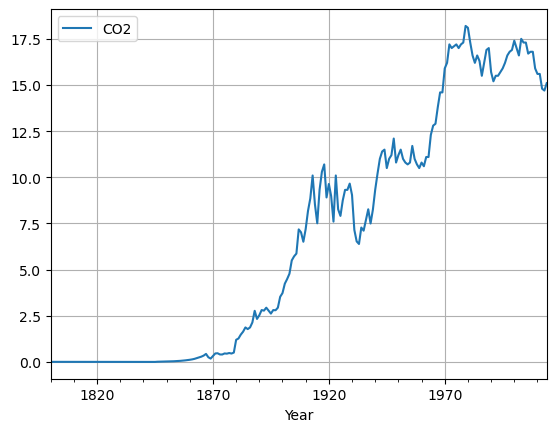

In [10]:
df.plot(grid=True)

1. train_df = df.loc[:'1991-01-01']:

- Ini adalah perintah untuk membuat DataFrame baru yang disebut train_df.
- df adalah DataFrame yang mungkin sudah ada sebelumnya dan berisi data time series.
- df.loc[:'1991-01-01'] adalah pengindeksan label yang digunakan untuk memilih baris dari df. Dalam hal ini, Anda memilih semua baris yang memiliki label waktu sebelum atau sama dengan tanggal '1991-01-01'. Ini akan menciptakan DataFrame train_df yang berisi data sampai tahun 1991.

2. test_df = df.loc['1992-01-01':]:

- Ini adalah perintah untuk membuat DataFrame lain yang disebut test_df.
- Sekali lagi, df adalah DataFrame yang sama yang digunakan sebelumnya.
- df.loc['1992-01-01':] adalah pengindeksan label yang digunakan untuk memilih baris dari df. Dalam hal ini, Anda memilih semua baris yang memiliki label waktu setelah atau sama dengan tanggal '1992-01-01'. Ini akan menciptakan DataFrame test_df yang berisi data mulai dari tahun 1992.

3. decompose_add = seasonal_decompose(df['CO2']):

- Ini adalah perintah untuk melakukan dekomposisi musiman pada data CO2 yang terdapat dalam kolom 'CO2' dari DataFrame df.
- seasonal_decompose adalah fungsi dari library statsmodels yang digunakan untuk memisahkan data time series menjadi komponen utama: trend, seasonality (musiman), dan residu (sisa).
- Hasil dari dekomposisi ini disimpan dalam variabel decompose_add, yang kemudian dapat digunakan untuk analisis lebih lanjut atau untuk memvisualisasikan komponen-komponen tersebut.

4. decompose_add.plot():

- Ini adalah perintah untuk memvisualisasikan hasil dekomposisi musiman yang disimpan dalam variabel decompose_add.
- Fungsi plot() digunakan untuk menggambar grafik komponen dekomposisi, termasuk trend, seasonality (musiman), dan residu.
- Ini membantu Anda dalam memahami bagaimana data time series terdiri dari tren jangka panjang, pola musiman, dan fluktuasi sisa yang tidak dapat dijelaskan oleh kedua komponen tersebut.

In [11]:
train_df = df.loc[:'1991-01-01']
test_df = df.loc['1992-01-01':]

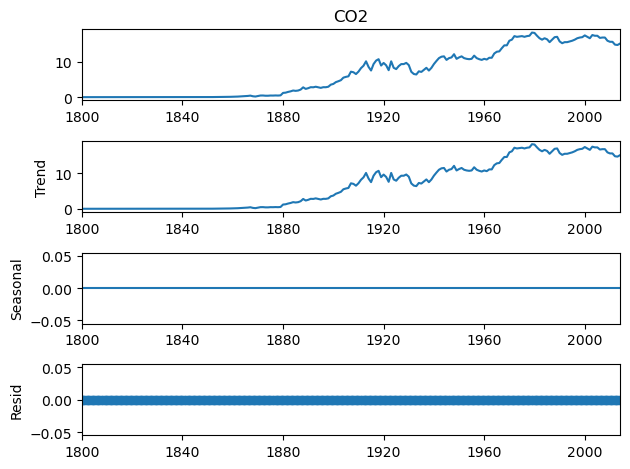

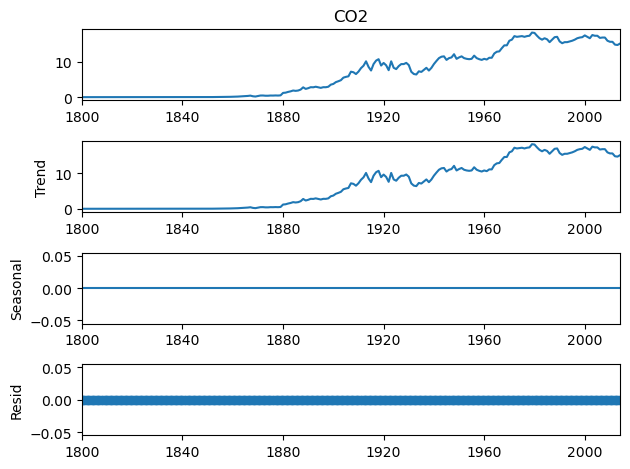

In [12]:
decompose_add = seasonal_decompose(df['CO2'])
decompose_add.plot()

Fungsi adf_test adalah untuk melakukan uji Dickey-Fuller Augmented (ADF) pada deret waktu yang diberikan. Uji Dickey-Fuller adalah salah satu uji yang digunakan dalam analisis deret waktu untuk menguji apakah suatu deret waktu stasioner atau tidak. Berikut adalah penjelasan setiap bagian dari kode tersebut:

1. def adf_test(timeseries):: Ini adalah deklarasi fungsi dengan satu parameter timeseries, yang akan mewakili deret waktu yang akan diuji.

2. print ('Hasil testing Dickey-Fuller'): Ini mencetak judul untuk keluaran hasil uji Dickey-Fuller ke layar.

3. print ('----------------------------------'): Ini mencetak garis putus-putus untuk pemisah sebelum hasil uji Dickey-Fuller.

4. adftest = adfuller(timeseries): Ini adalah panggilan fungsi adfuller, yang digunakan untuk melakukan uji Dickey-Fuller pada deret waktu timeseries. Hasil dari uji ini disimpan dalam variabel adftest.

5. adf_output = pd.Series(adftest[0:4], index=['Test statistic','p-value','Lags Used','Number of Observation Used']): Ini membuat objek pd.Series yang berisi hasil uji Dickey-Fuller yang penting. Hasil uji tersebut adalah sebagai berikut:

- Test statistic: Statistik uji Dickey-Fuller.
- p-value: Nilai p dari uji Dickey-Fuller.
- Lags Used: Jumlah lag yang digunakan dalam uji.
- Number of Observation Used: Jumlah pengamatan yang digunakan dalam uji.

6. for key, Value in adftest[4].items() :: Ini adalah loop yang digunakan untuk mengambil nilai-nilai kritis dari uji Dickey-Fuller yang disimpan dalam adftest[4]. Hasil uji kritis adalah ambang batas yang digunakan untuk menentukan apakah deret waktu stasioner atau tidak.

7. adf_output['Critical Value (%s)' %key] = Value: Di dalam loop, setiap nilai kritis (critical value) ditambahkan ke objek adf_output dengan kunci yang sesuai, yaitu "Critical Value (k)" di mana "k" adalah jumlah lag yang digunakan dalam uji.

8. print (adf_output): Terakhir, hasil uji Dickey-Fuller beserta nilai-nilai pentingnya dicetak ke layar.

9. adf_test(df.values): Panggilan fungsi adf_test dengan mengirimkan deret waktu dari DataFrame df sebagai argumen.

In [13]:
def adf_test(timeseries):
    print ('Hasil testing Dickey-Fuller')
    print ('----------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test statistic','p-value','Lags Used','Number of Observation Used'])
    for key, Value in adftest[4].items() :
        adf_output['Critical Value (%s)' %key] = Value
    print (adf_output)

adf_test(df.values)

Hasil testing Dickey-Fuller
----------------------------------
Test statistic                 -0.378463
p-value                         0.913633
Lags Used                       0.000000
Number of Observation Used    214.000000
Critical Value (1%)            -3.461282
Critical Value (5%)            -2.875143
Critical Value (10%)           -2.574020
dtype: float64


In [14]:
diff_df = df.diff()
diff_df.head()

,CO2
Year,
1800-01-01,NaN
1801-01-01,-0.00007
1802-01-01,-0.00006
1803-01-01,-0.00007
1804-01-01,-0.00006


In [15]:
diff_df.dropna(inplace=True)

<AxesSubplot:xlabel='Year'>

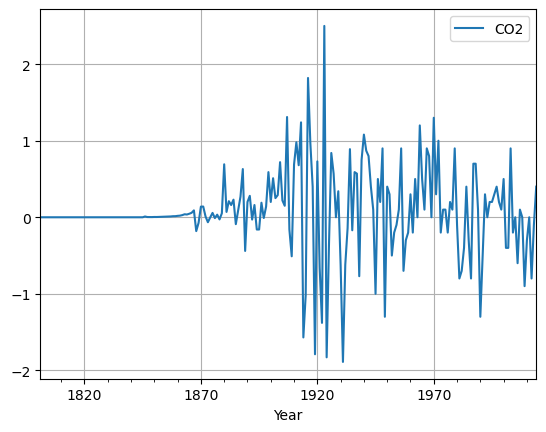

In [16]:
diff_df.plot(grid=True)

In [17]:
adf_test(diff_df)

Hasil testing Dickey-Fuller
----------------------------------
Test statistic                 -3.780005
p-value                         0.003119
Lags Used                      15.000000
Number of Observation Used    198.000000
Critical Value (1%)            -3.463815
Critical Value (5%)            -2.876251
Critical Value (10%)           -2.574611
dtype: float64


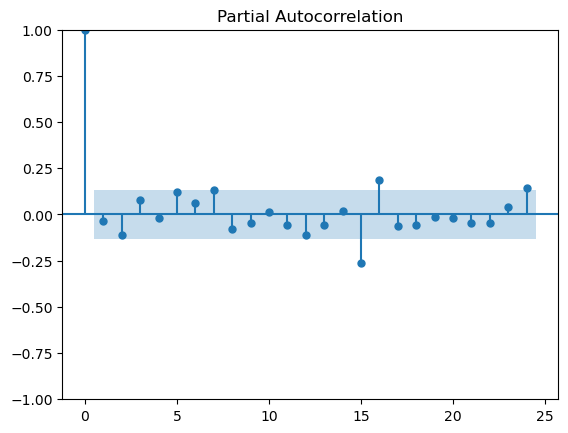

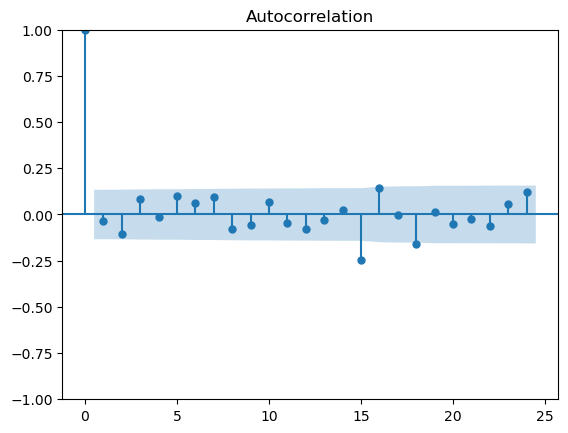

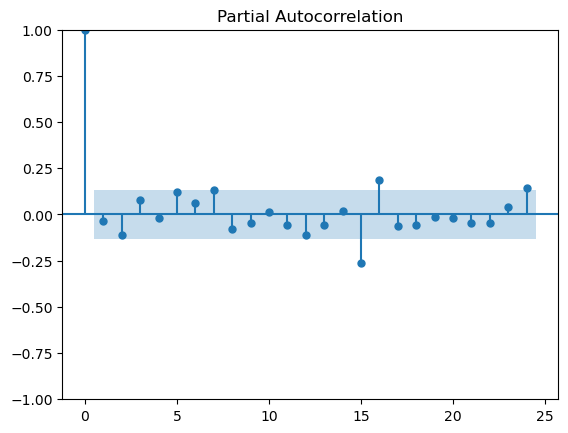

In [19]:
plot_acf(diff_df)
plot_pacf(diff_df)

# Single Exponential Smoothing

1. single_exp = SimpleExpSmoothing(train_df).fit()

- Pada baris ini, kita membuat objek model peramalan eksponensial sederhana (Simple Exponential Smoothing) dengan menggunakan data pelatihan (train_df). SimpleExpSmoothing adalah salah satu model peramalan yang digunakan untuk meramalkan data deret waktu berdasarkan pendekatan eksponensial sederhana. Kemudian, .fit() digunakan untuk menyesuaikan model dengan data pelatihan.

2. single_exp_train_pred = single_exp.fittedvalues

- Setelah model single_exp disesuaikan dengan data pelatihan, baris ini digunakan untuk menghasilkan prediksi pada data pelatihan itu sendiri. Hasil prediksi ini disimpan dalam variabel single_exp_train_pred.

3. single_exp_test_pred = single_exp.forecast(23)

- Pada baris ini, kita menggunakan model yang sudah disesuaikan untuk melakukan peramalan pada data uji (test_df). Metode .forecast(23) digunakan untuk meramalkan nilai-nilai selama 23 periode ke depan berdasarkan model eksponensial sederhana yang sudah dibuat. Hasil peramalan ini disimpan dalam variabel single_exp_test_pred.

4. train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')

- Baris ini digunakan untuk menggambar grafik data pelatihan (train_df) dengan garis putus-putus (style='--'), warna abu-abu (color='gray'), dan menampilkan legenda (legend=True) dengan label 'train_df'. Grafik ini akan menunjukkan data CO2 pada periode pelatihan.

5. test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')

- Baris ini digunakan untuk menggambar grafik data uji (test_df) dengan garis putus-putus (style='--'), warna merah (color='r'), dan menampilkan legenda (legend=True) dengan label 'test_df'. Grafik ini akan menunjukkan data CO2 pada periode uji.

6. single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

- Baris ini digunakan untuk menggambar grafik hasil peramalan yang telah dilakukan sebelumnya pada data uji (single_exp_test_pred). Grafik ini akan menunjukkan hasil peramalan dengan garis biru (color='b') dan menampilkan legenda (legend=True) dengan label 'Prediction'.

In [20]:
single_exp = SimpleExpSmoothing(train_df).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(23)

<AxesSubplot:xlabel='Year'>

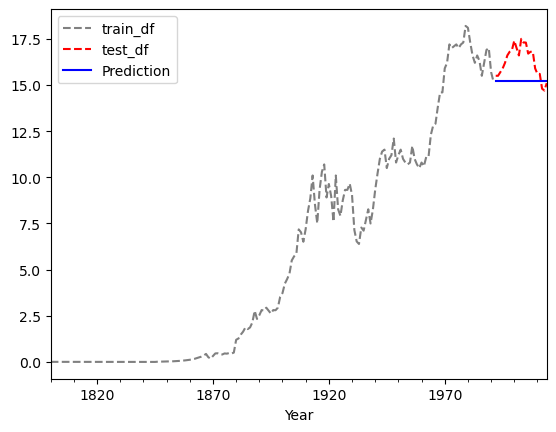

In [21]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
single_exp_test_pred.plot(color='b', legend=True, label='Prediction')

1. print('Train RMSE :',mean_squared_error(train_df, single_exp_train_pred)**0.5)

- Ini mencetak nilai Root Mean Squared Error (RMSE) dari prediksi pada data pelatihan.
- mean_squared_error(train_df, single_exp_train_pred) menghitung MSE antara data aktual (train_df) dan prediksi model (single_exp_train_pred).
- **0.5 digunakan untuk menghitung akar kuadrat dari MSE, mengubahnya menjadi RMSE.
- Hasilnya dicetak bersama dengan teks "Train RMSE :" menggunakan fungsi print.

2. print('Test RMSE :', mean_squared_error(test_df, single_exp_test_pred)**0.5)

- Ini mencetak nilai RMSE dari prediksi pada data uji.
- mean_squared_error(test_df, single_exp_test_pred) menghitung MSE antara data aktual (test_df) dan prediksi model (single_exp_test_pred).
- **0.5 digunakan untuk menghitung akar kuadrat dari MSE, mengubahnya menjadi RMSE.
- Hasilnya dicetak bersama dengan teks "Test RMSE :" menggunakan fungsi print.

3. print('Train MAPE :', mean_absolute_percentage_error(train_df, single_exp_train_pred))

- Ini mencetak nilai Mean Absolute Percentage Error (MAPE) dari prediksi pada data pelatihan.
- mean_absolute_percentage_error(train_df, single_exp_train_pred) menghitung MAPE antara data aktual (train_df) dan prediksi model (single_exp_train_pred).
- Hasilnya dicetak bersama dengan teks "Train MAPE :" menggunakan fungsi print.

4. print('Test MAPE :', mean_absolute_percentage_error(test_df, single_exp_test_pred))

- Ini mencetak nilai MAPE dari prediksi pada data uji.
- mean_absolute_percentage_error(test_df, single_exp_test_pred) menghitung MAPE antara data aktual (test_df) dan prediksi model (single_exp_test_pred).
- Hasilnya dicetak bersama dengan teks "Test MAPE :" menggunakan fungsi print.

In [22]:
print('Train RMSE :',mean_squared_error(train_df, single_exp_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df, single_exp_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df, single_exp_train_pred))
print('Test MAPE :', mean_absolute_percentage_error(test_df, single_exp_test_pred))

Train RMSE : 0.5646920026800116
Test RMSE : 1.342911302270165
Train MAPE : 0.08470530767414804
Test MAPE : 0.06861466412077383


# Double Exponential Smoothing

1. double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()

- Baris ini membuat objek model eksponensial ganda (double_exp) menggunakan pustaka atau modul yang mendukung metode eksponensial ganda (seperti statsmodels atau pustaka lainnya).
- train_df adalah data pelatihan yang digunakan untuk mengajarkan model bagaimana melakukan peramalan.
- trend=None menetapkan tren model menjadi None, yang berarti tidak ada komponen tren linier dalam model ini. Jadi, ini adalah peramalan eksponensial ganda tanpa tren.
- initialization_method='heuristic' mengatur metode inisialisasi model. Metode 'heuristic' sering digunakan untuk menginisialisasi model eksponensial ganda.
- seasonal='add' menetapkan jenis musiman sebagai "additive". Ini berarti musimannya akan ditambahkan ke data asli.
- seasonal_periods=29 menentukan jumlah periode musiman dalam data (dalam kasus ini 29).
- damped_trend=False mengatur apakah model harus menggunakan tren yang diedampingkan. Dalam hal ini, tren tidak diedampkan (False).
- .fit() digunakan untuk mengestimasi parameter model eksponensial ganda dari data pelatihan.

2. double_exp_train_pred = double_exp.fittedvalues

- Baris ini membuat variabel double_exp_train_pred yang berisi nilai peramalan yang dihasilkan oleh model eksponensial ganda pada data pelatihan. Ini adalah perkiraan model untuk data pelatihan yang digunakan untuk mengevaluasi seberapa baik model cocok dengan data yang ada.

3. double_exp_test_pred = double_exp.forecast(23)

- Baris ini menghasilkan perkiraan untuk 23 periode berikutnya menggunakan model eksponensial ganda yang telah diestimasi sebelumnya.
- .forecast(23) digunakan untuk menghasilkan 23 periode ke depan dari peramalan.

In [23]:
double_exp = ExponentialSmoothing(train_df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(23)

<AxesSubplot:xlabel='Year'>

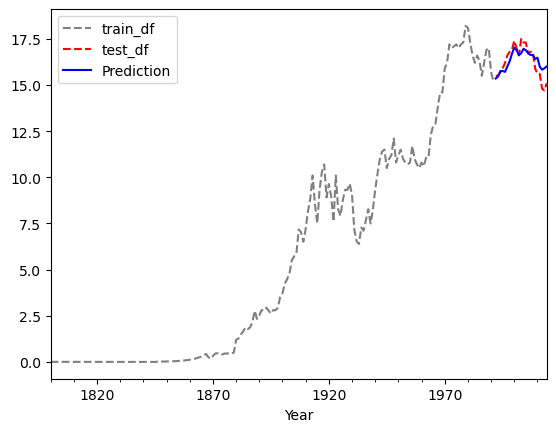

In [24]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
double_exp_test_pred.plot(color='b', legend=True, label='Prediction')

In [25]:
print('Train RMSE :',mean_squared_error(train_df, double_exp_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df, double_exp_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df, double_exp_train_pred))
print('Test MAPE :', mean_absolute_percentage_error(test_df, double_exp_test_pred))

Train RMSE : 0.5219963052653047
Test RMSE : 0.5352720574221986
Train MAPE : 12.80676949834386
Test MAPE : 0.026063825837478335


# Arima

1. ar = ARIMA(train_df, order=(15,1,15)).fit()

- ARIMA adalah singkatan dari AutoRegressive Integrated Moving Average, yang merupakan jenis model statistik yang digunakan untuk meramalkan data deret waktu.
- train_df adalah dataframe yang digunakan untuk melatih model ARIMA. Model ini akan diajarkan pada data dalam train_df.
- order=(15,1,15) adalah parameter yang digunakan untuk mengkonfigurasi model ARIMA. Parameter ini memiliki tiga komponen: (p, d, q).
- p (order of the autoregressive term) adalah 15, yang berarti model akan menggunakan 15 lag nilai sebelumnya untuk memprediksi nilai saat ini.
- d (degree of differencing) adalah 1, yang berarti data akan di-differencing satu kali untuk membuatnya stasioner. Ini adalah salah satu langkah dalam menghilangkan tren dan pola musiman dari data.
- q (order of the moving average term) adalah 15, yang berarti model akan menggunakan 15 nilai pergerakan rata-rata sebelumnya untuk memprediksi nilai saat ini.
- .fit() digunakan untuk melatih model ARIMA dengan data yang diberikan. Model akan belajar dari train_df sesuai dengan konfigurasi yang telah ditentukan.

2. ar_train_pred = ar.fittedvalues

- Setelah model ARIMA dilatih, ar.fittedvalues digunakan untuk mendapatkan prediksi pada data pelatihan (train_df). Ini akan menghasilkan prediksi yang sesuai dengan data pelatihan berdasarkan model yang telah dilatih.

3. ar_test_pred = ar.forecast(23)

- ar.forecast(23) digunakan untuk membuat prediksi masa depan menggunakan model ARIMA yang telah dilatih. Angka 23 mengindikasikan bahwa kita ingin membuat 23 prediksi ke depan. Hasilnya akan berupa array atau deret waktu yang berisi prediksi untuk 23 periode berikutnya setelah data pelatihan.

Secara keseluruhan, kode ini menggambarkan proses pelatihan model ARIMA dengan parameter (15,1,15) pada data pelatihan train_df. Setelah pelatihan, kode tersebut menghasilkan prediksi untuk data pelatihan (ar_train_pred) dan prediksi untuk 23 periode ke depan setelah data pelatihan (ar_test_pred). Model ARIMA digunakan untuk memodelkan pola dalam data deret waktu dan digunakan untuk membuat prediksi berdasarkan pola tersebut.

In [26]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [27]:
ar = ARIMA(train_df, order=(15,1,15)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(23)

<AxesSubplot:xlabel='Year'>

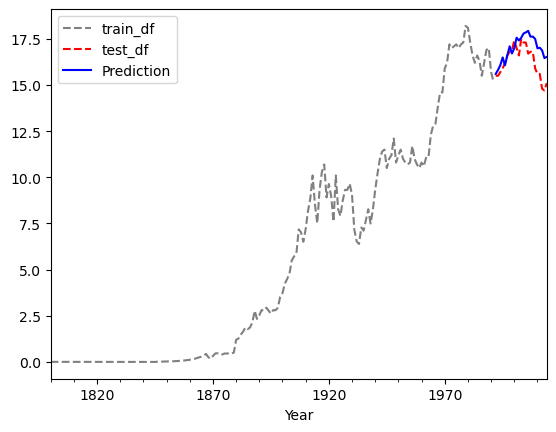

In [28]:
train_df['CO2'].plot(style='--', color='gray', legend=True, label='train_df')
test_df['CO2'].plot(style='--', color='r', legend=True, label='test_df')
ar_test_pred.plot(color='b', legend=True, label='Prediction')

In [29]:
print('Train RMSE :',mean_squared_error(train_df, ar_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df, ar_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df, ar_train_pred))
print('Test MAPE :', mean_absolute_percentage_error(test_df, ar_test_pred))

Train RMSE : 0.4678524899028528
Test RMSE : 0.9605096043151236
Train MAPE : 0.08144928925922511
Test MAPE : 0.04786259357704302


# Perbandingan Algoritma

1. import pandas as pd: Ini adalah baris pertama code yang mengimpor library pandas dengan alias pd. Pandas adalah library yang digunakan untuk manipulasi dan analisis data dalam Python.

2. comparision_df = pd.DataFrame(data=[['Single Exp Smoothing', 1.3429, 0.0686], ['Double Exp Smoothing', 0.5352, 0.0260], ['ARIMA', 0.9549, 0.0472]], columns=['Model', 'RMSE', 'MAPE']): Baris ini membuat sebuah DataFrame yang disebut comparision_df. DataFrame ini dibuat dengan mengambil data dalam bentuk daftar (list) dari daftar-daftar (list of lists). Setiap daftar dalam data berisi informasi tentang sebuah model, yaitu nama model, nilai RMSE (Root Mean Square Error), dan nilai MAPE (Mean Absolute Percentage Error). Data ini disusun dalam tiga baris dan tiga kolom.

3. columns=['Model', 'RMSE', 'MAPE']: Bagian ini menentukan nama kolom-kolom dalam DataFrame. Kolom pertama bernama 'Model', kolom kedua bernama 'RMSE', dan kolom ketiga bernama 'MAPE'.

4. comparision_df.set_index('Model', inplace=True): Baris ini mengatur kolom 'Model' sebagai indeks (index) dari DataFrame comparision_df. Ini berarti setiap baris dalam DataFrame akan diidentifikasi oleh nama model. Argumen inplace=True digunakan untuk mengubah DataFrame asli tanpa perlu menugaskan hasilnya ke variabel baru. Setelah baris ini dieksekusi, indeks DataFrame akan menjadi nama-nama model, dan DataFrame akan terlihat seperti ini:

In [30]:
comparision_df = pd.DataFrame(data=[
    ['Single Exp Smoothing', 1.3429, 0.0686],
    ['Double Exp Smoothing', 0.5352, 0.0260],
    ['ARIMA', 0.9549, 0.0472]
    ],
    columns=['Model', 'RMSE', 'MAPE'])
comparision_df.set_index('Model', inplace=True)

In [31]:
comparision_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
Double Exp Smoothing,0.5352,0.0260
ARIMA,0.9549,0.0472
Single Exp Smoothing,1.3429,0.0686


1. ExponentialSmoothing(df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit(): Ini adalah bagian pertama dari code, yang digunakan untuk melakukan peramalan menggunakan metode Exponential Smoothing. Mari kita lihat parameter-parameter yang digunakan:

- df: Ini adalah DataFrame yang berisi data deret waktu yang ingin Anda ramalkan. Anda akan mengasumsikan bahwa ada kolom 'CO2' di dalam DataFrame df yang akan diambil sebagai data untuk peramalan.
- trend=None: Parameter ini digunakan untuk mengontrol tren dalam data. Dalam contoh ini, tren tidak digunakan (None).
- initialization_method='heuristic': Metode inisialisasi model Exponential Smoothing yang digunakan adalah 'heuristic'.
- seasonal='add': Jenis musiman yang digunakan adalah 'additive', yang berarti bahwa efek musiman akan ditambahkan secara linear ke data.
- seasonal_periods=29: Periode musiman, yaitu jumlah observasi dalam satu siklus musiman.
- damped_trend=False: Parameter ini mengontrol apakah tren dalam model Exponential Smoothing harus di-dampen (diredam) atau tidak. Dalam contoh ini, tren tidak di-dampen (False).
Kemudian .fit() digunakan untuk melatih model Exponential Smoothing dengan data yang diberikan.

2. double_exp_pred = double_exp.forecast(20): Setelah model Exponential Smoothing dilatih, kode ini digunakan untuk melakukan peramalan sebanyak 20 periode ke depan menggunakan model yang telah dilatih. Hasil peramalan disimpan dalam variabel double_exp_pred.

3. df['CO2'].plot(style='--', color='gray', legend=True, label='known'): Ini adalah bagian kode untuk membuat plot data yang diketahui (known data) dari kolom 'CO2' dalam DataFrame df. Garis akan berwarna abu-abu dengan gaya garis putus-putus ('--'). Label 'known' digunakan untuk legenda grafik.

4. double_exp_pred.plot(color='b', legend=True, label='Prediction'): Ini adalah bagian kode untuk membuat plot hasil peramalan yang telah disimpan dalam variabel double_exp_pred. Garis akan berwarna biru ('b'). Label 'Prediction' digunakan untuk legenda grafik.

5. plt.show(): Ini adalah bagian kode yang digunakan untuk menampilkan grafik yang telah dibuat menggunakan pustaka matplotlib. Grafik akan muncul di jendela pop-up atau di lingkungan pengembangan Anda, tergantung pada tempat Anda menjalankan kode ini.

In [32]:
double_exp = ExponentialSmoothing(df, trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(20)

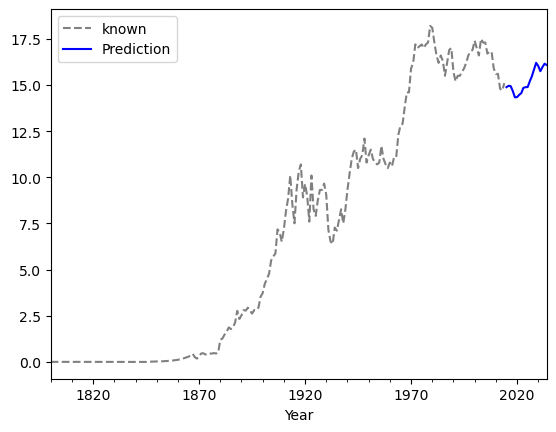

In [33]:
df['CO2'].plot(style='--', color='gray', legend=True, label='known')
double_exp_pred.plot(color='b', legend=True, label='Prediction')
plt.show()

In [34]:
import pickle

In [35]:
pickle.dump(double_exp, open('prediksi_co2.sav','wb'))